In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, lasso_path, lars_path, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd 
import scipy.io as spio

Orginal Image


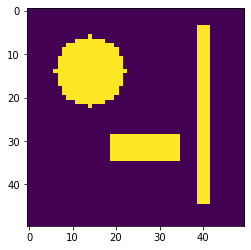

In [2]:
image = spio.loadmat('cs.mat')['img']
print("Orginal Image")
plt.figure()
plt.imshow(image) 
plt.show() 

Optimal alpha 0.07030681401683354
Recovered Image with Lasso


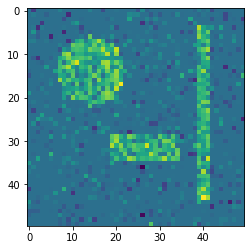

In [3]:
# the reconstruction of the raw image x is y=Ax+n
np.random.seed(2500)
x = image.reshape(2500,1)
A = np.random.normal(0, 1, (1300, 2500))
n = np.random.normal(0, 5, (1300, 1))
y = A.dot(x) + n

# LASSO 
reg_lasso = LassoCV(cv = 10, random_state=1).fit(A, y.ravel())
reg1 = reg_lasso.coef_.reshape(50,50)
print('Optimal alpha',reg_lasso.alpha_)
print ("Recovered Image with Lasso")
plt.figure()
plt.imshow(reg1) 
plt.show() 

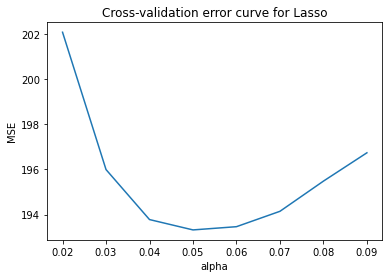

In [4]:
#Reference http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
alphas = np.arange(0.02, 0.1, 0.01)
mse = []
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
for i in alphas:
    lasso = Lasso(alpha = i, tol=1e-2)
    score = -1*cross_val_score(lasso, A, y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append([i,score])

plt.plot(np.array(mse)[:,0], np.array(mse)[:,1])
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("Cross-validation error curve for Lasso")
plt.show()

optimal alpha 10.0


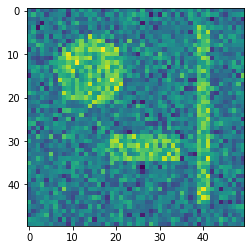

In [5]:
reg_ridge = RidgeCV(cv = 10).fit(A, y.ravel())
print('optimal alpha',reg_ridge.alpha_)
reg2 = reg_ridge.coef_.reshape(50,50)
plt.figure()
plt.imshow(reg2) 
plt.show() 

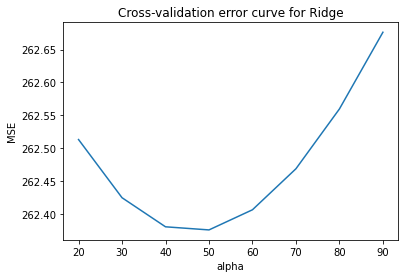

In [6]:
alphas = np.arange(20, 100, 10)
mse_r = []
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)
for i in alphas:
    ridge = Ridge(alpha = i)
    score = -1*cross_val_score(ridge, A, y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse_r.append([i,score])   

plt.plot(np.array(mse_r)[:,0], np.array(mse_r)[:,1])
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("Cross-validation error curve for Ridge")
plt.show()